### 라이브러리 선언

In [1]:
%matplotlib notebook
import pandas as pd
import matplotlib.pyplot as plt

### 데이터 가져오기

In [2]:
data = pd.read_html('http://www.kakao.com/services/talk/voices/data')[0]

In [3]:
data.head()

,Unnamed: 0,Unnamed: 1,SKT,KT,LGU+,Japan,USA
0,09 / May,Connection,NaN,NaN,NaN,NaN,NaN
1,Packet Loss(%),0.89 %,0.51 %,0.0 %,0.61 %,0.71 %,NaN
2,08 / May,Connection,NaN,NaN,NaN,NaN,NaN
3,Packet Loss(%),0.66 %,0.03 %,0.0 %,0.69 %,1.05 %,NaN
4,07 / May,Connection,NaN,NaN,NaN,NaN,NaN


In [4]:
data.columns = ['mdate', 'SKT', 'KT', 'LGU+', 'JAPAN', 'USA', 'ETC']

In [5]:
data.head()

,mdate,SKT,KT,LGU+,JAPAN,USA,ETC
0,09 / May,Connection,NaN,NaN,NaN,NaN,NaN
1,Packet Loss(%),0.89 %,0.51 %,0.0 %,0.61 %,0.71 %,NaN
2,08 / May,Connection,NaN,NaN,NaN,NaN,NaN
3,Packet Loss(%),0.66 %,0.03 %,0.0 %,0.69 %,1.05 %,NaN
4,07 / May,Connection,NaN,NaN,NaN,NaN,NaN


In [6]:
data = data.drop('ETC', 1)

In [7]:
value_data = data[data.SKT != 'Connection']
value_data.head()

,mdate,SKT,KT,LGU+,JAPAN,USA
1,Packet Loss(%),0.89 %,0.51 %,0.0 %,0.61 %,0.71 %
3,Packet Loss(%),0.66 %,0.03 %,0.0 %,0.69 %,1.05 %
5,Packet Loss(%),0.38 %,1.61 %,0.0 %,1.74 %,0.67 %
7,Packet Loss(%),0.77 %,0.51 %,0.0 %,1.71 %,0.47 %
9,Packet Loss(%),0.2 %,0.62 %,0.45 %,1.41 %,0.65 %


In [8]:
time_data = data[data.SKT == 'Connection'].mdate
time_data.head()

0    09 / May
2    08 / May
4    07 / May
6    06 / May
8    05 / May
Name: mdate, dtype: object

In [9]:
time_data = time_data.reset_index(drop=True)
value_data = value_data.reset_index(drop=True)
value_data.head()

,mdate,SKT,KT,LGU+,JAPAN,USA
0,Packet Loss(%),0.89 %,0.51 %,0.0 %,0.61 %,0.71 %
1,Packet Loss(%),0.66 %,0.03 %,0.0 %,0.69 %,1.05 %
2,Packet Loss(%),0.38 %,1.61 %,0.0 %,1.74 %,0.67 %
3,Packet Loss(%),0.77 %,0.51 %,0.0 %,1.71 %,0.47 %
4,Packet Loss(%),0.2 %,0.62 %,0.45 %,1.41 %,0.65 %


In [10]:
value_data['mdate'] = time_data
value_data.head()

,mdate,SKT,KT,LGU+,JAPAN,USA
0,09 / May,0.89 %,0.51 %,0.0 %,0.61 %,0.71 %
1,08 / May,0.66 %,0.03 %,0.0 %,0.69 %,1.05 %
2,07 / May,0.38 %,1.61 %,0.0 %,1.74 %,0.67 %
3,06 / May,0.77 %,0.51 %,0.0 %,1.71 %,0.47 %
4,05 / May,0.2 %,0.62 %,0.45 %,1.41 %,0.65 %


In [11]:
sorted_table = value_data.sort_index(ascending=False)
sorted_table.head()

,mdate,SKT,KT,LGU+,JAPAN,USA
1789,04 / Jun,1.24 %,0.71 %,1.13 %,0.66 %,1.19 %
1788,05 / Jun,9.73 %,1.26 %,1.86 %,0.67 %,1.83 %
1787,06 / Jun,20.05 %,1.13 %,53.93 %,0.98 %,1.9 %
1786,07 / Jun,16.66 %,0.87 %,51.64 %,0.83 %,1.69 %
1785,08 / Jun,19.89 %,1.55 %,51.86 %,0.79 %,1.6 %


In [12]:
sorted_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1790 entries, 1789 to 0
Data columns (total 6 columns):
mdate    1790 non-null object
SKT      1790 non-null object
KT       1790 non-null object
LGU+     1790 non-null object
JAPAN    1790 non-null object
USA      1790 non-null object
dtypes: object(6)
memory usage: 97.9+ KB


In [13]:
sorted_table = sorted_table.replace({' \%' : ''}, regex=True)
sorted_table.head()

,mdate,SKT,KT,LGU+,JAPAN,USA
1789,04 / Jun,1.24,0.71,1.13,0.66,1.19
1788,05 / Jun,9.73,1.26,1.86,0.67,1.83
1787,06 / Jun,20.05,1.13,53.93,0.98,1.9
1786,07 / Jun,16.66,0.87,51.64,0.83,1.69
1785,08 / Jun,19.89,1.55,51.86,0.79,1.6


In [14]:
sorted_table[['SKT', 'KT', 'LGU+', 'JAPAN', 'USA']] = sorted_table[['SKT', 'KT', 'LGU+', 'JAPAN', 'USA']].apply(pd.to_numeric)

In [15]:
sorted_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1790 entries, 1789 to 0
Data columns (total 6 columns):
mdate    1790 non-null object
SKT      1790 non-null float64
KT       1790 non-null float64
LGU+     1790 non-null float64
JAPAN    1790 non-null float64
USA      1790 non-null float64
dtypes: float64(5), object(1)
memory usage: 97.9+ KB


### 그래프로 데이터 그려보기

<IPython.core.display.Javascript object>


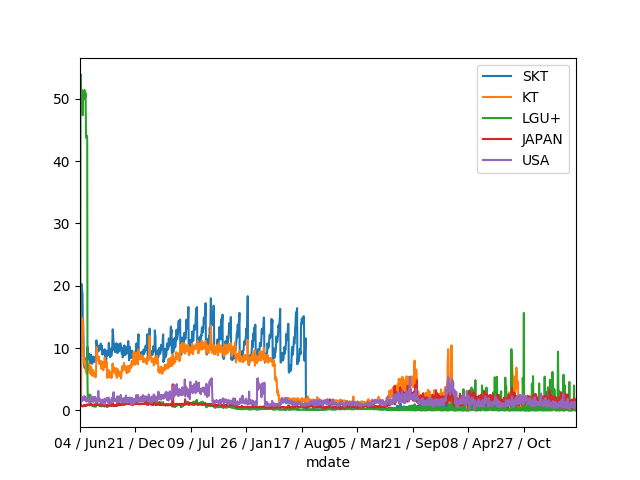

In [16]:
sorted_table.plot(x='mdate')

<IPython.core.display.Javascript object>


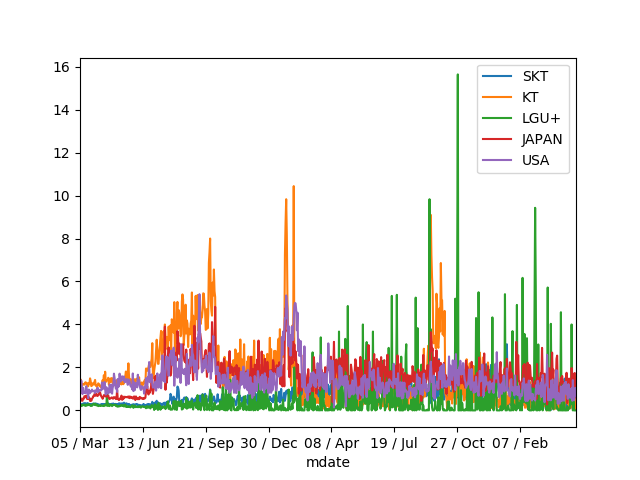

In [17]:
sorted_table[1000:].plot(x='mdate')

<IPython.core.display.Javascript object>


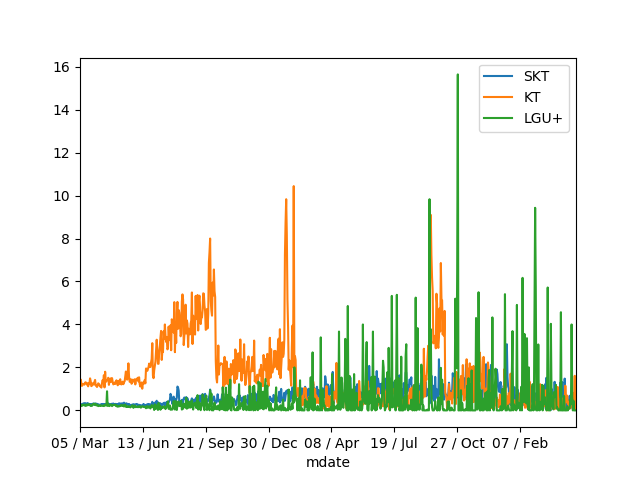

In [18]:
sorted_table[1000:][['mdate', 'SKT', 'KT', 'LGU+']].plot(x='mdate')